In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [4]:
#"Blood Pressure" variable needs to be edited.


df[["Blood_Sistolik_Pres", "Blood_Diyastolik _Pres"]] = df["Blood Pressure"].str.split('/', expand=True)

df["Blood_Sistolik_Pres"] = df["Blood Pressure"].apply(lambda x: x.split("/")[0]).astype(int)
df["Blood_Diyastolik _Pres"] = df["Blood Pressure"].apply(lambda x: x.split("/")[1]).astype(int)
df.drop("Blood Pressure", axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   object 
 12  Previous Heart Probl

In [6]:
df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
Blood_Sistolik_Pres                0
Blood_Diyastolik _Pres             0
d

In [7]:
df = df.drop('Patient ID', axis=1)

In [8]:
df.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Blood_Sistolik_Pres,Blood_Diyastolik _Pres
0,67,Male,208,72,0,0,1,0,0,4.168189,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,21,Male,389,98,1,1,1,1,1,1.813242,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,21,Female,324,72,1,0,0,0,0,2.078353,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,84,Male,383,73,1,1,1,0,1,9.828130,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,66,Male,318,93,1,1,1,1,0,5.804299,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


In [9]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

le = LabelEncoder()

# Apply label encoding to each column with object dtype
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])

df.head()


,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Blood_Sistolik_Pres,Blood_Diyastolik _Pres
0,67,1,208,72,0,0,1,0,0,4.168189,...,31.251233,286,0,6,0,5,1,0,158,88
1,21,1,389,98,1,1,1,1,1,1.813242,...,27.194973,235,1,7,3,4,0,0,165,93
2,21,0,324,72,1,0,0,0,0,2.078353,...,28.176571,587,4,4,6,3,0,0,174,99
3,84,1,383,73,1,1,1,0,1,9.828130,...,36.464704,378,3,4,3,4,0,0,163,100
4,66,1,318,93,1,1,1,1,0,5.804299,...,21.809144,231,1,5,16,1,0,0,91,88


In [10]:
df['Diet'].unique()

array([0, 2, 1])

In [11]:
y = df['Heart Attack Risk']
x = df.drop('Heart Attack Risk', axis=1)
x.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Blood_Sistolik_Pres,Blood_Diyastolik _Pres
0,67,1,208,72,0,0,1,0,0,4.168189,...,261404,31.251233,286,0,6,0,5,1,158,88
1,21,1,389,98,1,1,1,1,1,1.813242,...,285768,27.194973,235,1,7,3,4,0,165,93
2,21,0,324,72,1,0,0,0,0,2.078353,...,235282,28.176571,587,4,4,6,3,0,174,99
3,84,1,383,73,1,1,1,0,1,9.828130,...,125640,36.464704,378,3,4,3,4,0,163,100
4,66,1,318,93,1,1,1,1,0,5.804299,...,160555,21.809144,231,1,5,16,1,0,91,88


In [12]:
#Scale the data
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

x = pd.DataFrame(scale.fit_transform(x, y), columns=x.columns)

In [13]:
x.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Blood_Sistolik_Pres,Blood_Diyastolik _Pres
0,0.625557,0.658765,-0.641579,-0.147042,-1.369651,-0.986061,0.339157,-1.002857,-1.219867,-1.010838,...,1.280130,0.373454,-0.588539,-1.528843,-0.514750,-1.620793,1.609515,1.350571,0.870044,0.193782
1,-1.539322,0.658765,1.596895,1.118179,0.730113,1.014136,0.339157,0.997151,0.819762,-1.418027,...,1.582523,-0.268479,-0.816487,-1.090738,-0.011823,-1.102536,0.983525,-0.740428,1.135714,0.534480
2,-1.539322,-1.517992,0.793023,-0.147042,0.730113,-0.986061,-2.948488,-1.002857,-1.219867,-1.372188,...,0.955917,-0.113134,0.756800,0.223577,-1.520604,-0.584279,0.357535,-0.740428,1.477290,0.943319
3,1.425621,0.658765,1.522691,-0.098380,0.730113,1.014136,0.339157,-1.002857,0.819762,-0.032188,...,-0.404902,1.198524,-0.177339,-0.214528,-1.520604,-1.102536,0.983525,-0.740428,1.059809,1.011458
4,0.578495,0.658765,0.718820,0.874867,0.730113,1.014136,0.339157,0.997151,-1.219867,-0.727941,...,0.028445,-1.120826,-0.834365,-1.090738,-1.017677,1.143245,-0.894445,-0.740428,-1.672797,0.193782


In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(), 
    'Naive Bayes': GaussianNB(),       
    'MLP Neural Network': MLPClassifier() 
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

Training Logistic Regression...
Logistic Regression Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753

Training Decision Tree...
Decision Tree Accuracy: 0.55
              precision    recall  f1-score   support

           0       0.65      0.65      0.65      1125
           1       0.37      0.36      0.36       628

    accuracy                           0.55      1753
   macro avg       0.51      0.51      0.51      1753
weighted avg       0.55      0.55      0.55      1753

Training Random Forest...
Random Forest Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.64      0.98      0.78      1125
           1       0.39      0.02      0.04       628

    a

In [14]:
#Select columns with most significance
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(Lasso(0.005))
model.fit(x, y)

columns = x.columns[model.get_support()]
columns

Index(['Cholesterol', 'Diabetes', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Sleep Hours Per Day', 'Hemisphere',
       'Blood_Sistolik_Pres'],
      dtype='object')

In [15]:
#Select important columns use for prediction with imp score > 0 
from sklearn.feature_selection import mutual_info_regression
imp = mutual_info_regression(x, y)

df = pd.DataFrame(imp, index=x.columns).reset_index().sort_values(0, ascending=False)
df.columns = ['col', 'score']

columns_II = df.loc[df['score']>0]['col'].to_list()

In [16]:
columns_II

['Obesity',
 'Triglycerides',
 'Stress Level',
 'Hemisphere',
 'BMI',
 'Exercise Hours Per Week',
 'Income',
 'Diet',
 'Sleep Hours Per Day',
 'Medication Use',
 'Smoking',
 'Age',
 'Previous Heart Problems']

In [17]:
#We are going for the 'Lasso' model here to get the final X columns
x = x[columns]

Explained variance ratio (first two components): [0.1303108  0.12895651]


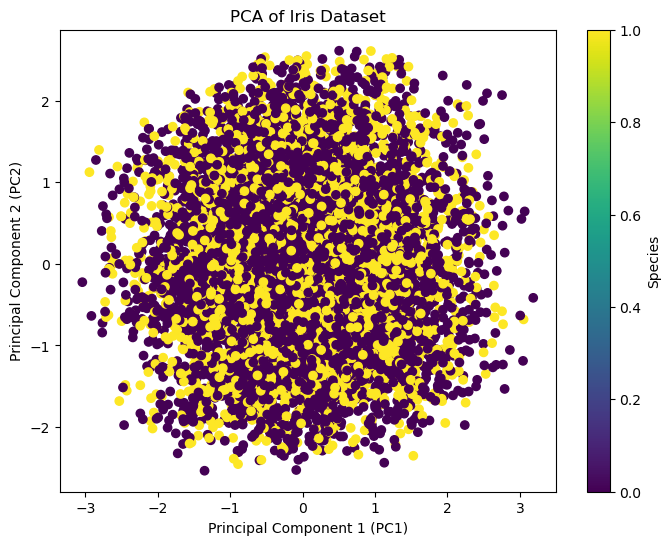

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA



# Apply PCA with 2 components (reducing to 2 dimensions)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(x)

# Explained variance ratio (percentage of variance captured by each component)
explained_variance_ratio = pca.explained_variance_ratio_

print(f"Explained variance ratio (first two components): {explained_variance_ratio}")

# Create a DataFrame with the reduced dimensions
df_reduced = pd.DataFrame(X_reduced, columns=["PC1", "PC2"])

# Plot the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(df_reduced["PC1"], df_reduced["PC2"], c=y, cmap="viridis")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.title("PCA of Iris Dataset")
plt.colorbar(label="Species")
plt.show()


In [121]:
df_reduced.head()

,PC1,PC2
0,-0.613504,-0.719004
1,-0.120569,-0.560848
2,-0.350624,-0.468325
3,0.664751,-1.146706
4,-0.180947,1.996813


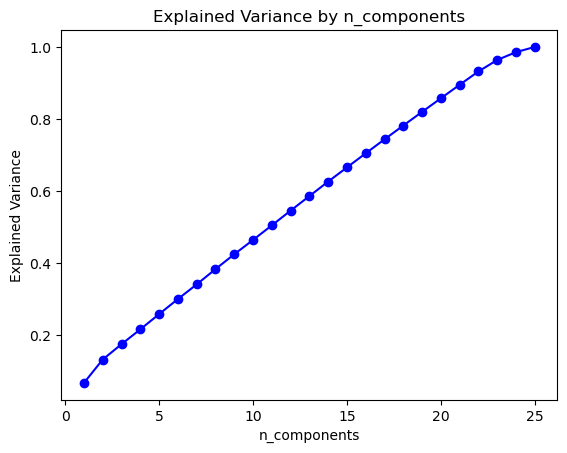

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

n_components_range = np.arange(1, x.shape[1] + 1)

explained_variance = []

for n in n_components_range:
    pca = PCA(n_components=n)
    principal_components = pca.fit_transform(x)
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

plt.plot(n_components_range, explained_variance, 'bo-')
plt.xlabel('n_components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by n_components')
plt.show()

In [122]:
#Split the data to Train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_reduced, y, test_size=0.33, random_state=42)

In [123]:
#Prediction function
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.model_selection import cross_val_score

def predict(ml_model):
    model = ml_model.fit(x_train, y_train)
    pred = model.predict(x_test)
    print(f'Predictions: {pred}')
    print('\n')
    print(f'Training Score: {model.score(x_train, y_train)}')
    print('\n')
    
    print('\n')
    print("Classification Report:")
    print(classification_report(pred, y_test))
    print('\n')
    print(f'Accuracy Score: {accuracy_score(pred, y_test)}')
    print(f'Mean Squared Error: {mean_squared_error(pred, y_test)}')
#     print(f'AUC Score: {roc_auc_score(pred, y_test)}')

    
    plt.figure(figsize=(4,2))
    sns.kdeplot(pred, shade=True)
    sns.kdeplot(y_test, shade=True)
    plt.legend(['pred', 'y_test'])
    
        # Plot confusion matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix( y_test,pred)
    print(cm)
    
    print('\n')
    plt.show()

Predictions: [0 1 0 ... 0 1 0]


Training Score: 1.0




Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.63      0.63      1852
           1       0.34      0.34      0.34      1040

    accuracy                           0.52      2892
   macro avg       0.48      0.48      0.48      2892
weighted avg       0.52      0.52      0.52      2892



Accuracy Score: 0.5242047026279392
Mean Squared Error: 0.47579529737206083
[[1167  691]
 [ 685  349]]




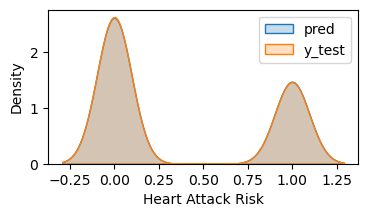

In [124]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

predict(tree)

Predictions: [0 0 0 ... 0 0 0]


Training Score: 1.0




Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.65      0.71      2289
           1       0.22      0.38      0.28       603

    accuracy                           0.59      2892
   macro avg       0.51      0.51      0.50      2892
weighted avg       0.68      0.59      0.62      2892



Accuracy Score: 0.5909405255878285
Mean Squared Error: 0.4090594744121715
[[1482  376]
 [ 807  227]]




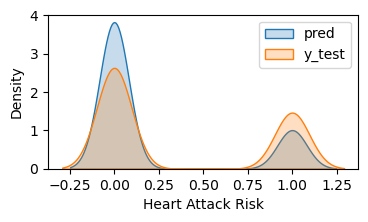

In [125]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

predict(forest)

Predictions: [0 0 1 ... 0 0 0]


Training Score: 0.7249190938511327




Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.65      0.71      2238
           1       0.24      0.38      0.30       654

    accuracy                           0.59      2892
   macro avg       0.51      0.51      0.50      2892
weighted avg       0.66      0.59      0.62      2892



Accuracy Score: 0.5885200553250346
Mean Squared Error: 0.4114799446749654
[[1453  405]
 [ 785  249]]




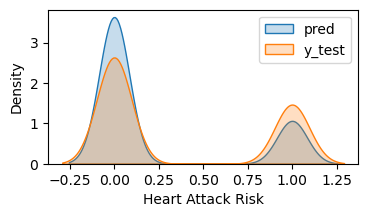

In [127]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

predict(knn)

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier

from imblearn.under_sampling import RandomUnderSampler
from category_encoders import LeaveOneOutEncoder
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

import warnings
warnings.filterwarnings("ignore")

In [97]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=42)

In [100]:
model_list = [LinearSVC(), LogisticRegression(), GradientBoostingClassifier(), MLPClassifier(),
              AdaBoostClassifier(), HistGradientBoostingClassifier(), SVC(), XGBRFClassifier(),
              CatBoostClassifier(verbose=False)]

roc_auc_list = []
accuracy_list = []

for model in model_list: 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    roc_auc_list.append(roc_auc)
    accuracy_list.append(accuracy)
    
    print(f'Model Name: {model}')
    print(f'AUC ROC score is: {roc_auc:.3f}')
    print(f"accuracy score is: {accuracy:.3f}")
    print("\n", "-" * 50)

Model Name: LinearSVC()
AUC ROC score is: 0.500
accuracy score is: 0.642

 --------------------------------------------------
Model Name: LogisticRegression()
AUC ROC score is: 0.500
accuracy score is: 0.642

 --------------------------------------------------
Model Name: GradientBoostingClassifier()
AUC ROC score is: 0.502
accuracy score is: 0.636

 --------------------------------------------------
Model Name: MLPClassifier()
AUC ROC score is: 0.507
accuracy score is: 0.577

 --------------------------------------------------
Model Name: AdaBoostClassifier()
AUC ROC score is: 0.496
accuracy score is: 0.631

 --------------------------------------------------
Model Name: HistGradientBoostingClassifier()
AUC ROC score is: 0.507
accuracy score is: 0.623

 --------------------------------------------------
Model Name: SVC()
AUC ROC score is: 0.500
accuracy score is: 0.642

 --------------------------------------------------
Model Name: XGBRFClassifier(base_score=None, booster=None, callb

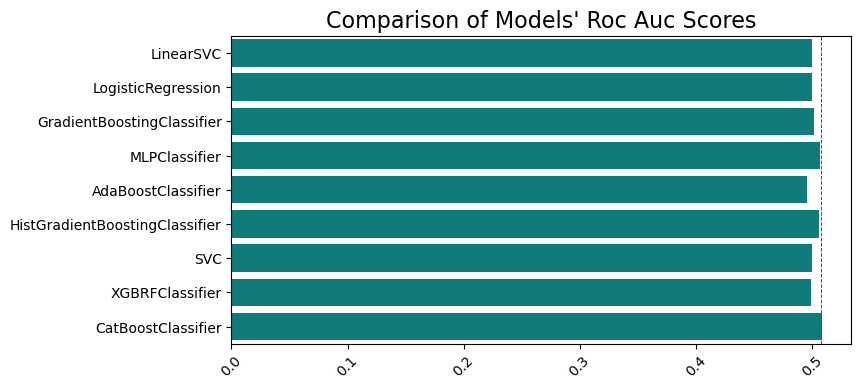

In [101]:
models = ["LinearSVC", "LogisticRegression", "GradientBoostingClassifier", "MLPClassifier",
        "AdaBoostClassifier", "HistGradientBoostingClassifier", "SVC", "XGBRFClassifier",
          "CatBoostClassifier"]

plt.figure(figsize=(8,4))
sns.barplot(x=roc_auc_list, y=models, color="#008b8b")
plt.xticks(rotation=45)
plt.axvline(x=0.508, lw=0.7, color="r", ls="--")
plt.title("Comparison of Models' Roc Auc Scores", fontsize=16)
plt.show()

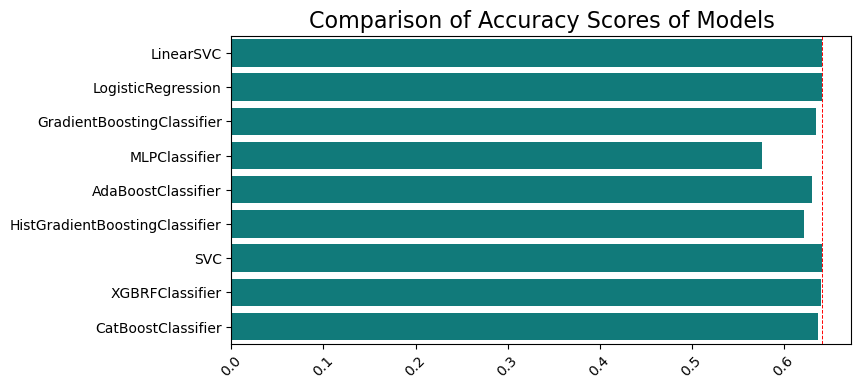

In [102]:
models = ["LinearSVC", "LogisticRegression", "GradientBoostingClassifier", "MLPClassifier",
    "AdaBoostClassifier", "HistGradientBoostingClassifier", "SVC", "XGBRFClassifier", "CatBoostClassifier"]

plt.figure(figsize=(8,4))
sns.barplot(x=accuracy_list, y=models, color="#008b8b")
plt.xticks(rotation=45)
plt.axvline(x=0.64168886, lw=0.7, color="r", ls="--")
plt.title("Comparison of Accuracy Scores of Models", fontsize=16)
plt.show()

In [141]:
x.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Blood_Sistolik_Pres,Blood_Diyastolik _Pres
0,0.625557,0.658765,-0.641579,-0.147042,-1.369651,-0.986061,0.339157,-1.002857,-1.219867,-1.010838,...,1.280130,0.373454,-0.588539,-1.528843,-0.514750,-1.620793,1.609515,1.350571,0.870044,0.193782
1,-1.539322,0.658765,1.596895,1.118179,0.730113,1.014136,0.339157,0.997151,0.819762,-1.418027,...,1.582523,-0.268479,-0.816487,-1.090738,-0.011823,-1.102536,0.983525,-0.740428,1.135714,0.534480
2,-1.539322,-1.517992,0.793023,-0.147042,0.730113,-0.986061,-2.948488,-1.002857,-1.219867,-1.372188,...,0.955917,-0.113134,0.756800,0.223577,-1.520604,-0.584279,0.357535,-0.740428,1.477290,0.943319
3,1.425621,0.658765,1.522691,-0.098380,0.730113,1.014136,0.339157,-1.002857,0.819762,-0.032188,...,-0.404902,1.198524,-0.177339,-0.214528,-1.520604,-1.102536,0.983525,-0.740428,1.059809,1.011458
4,0.578495,0.658765,0.718820,0.874867,0.730113,1.014136,0.339157,0.997151,-1.219867,-0.727941,...,0.028445,-1.120826,-0.834365,-1.090738,-1.017677,1.143245,-0.894445,-0.740428,-1.672797,0.193782


In [284]:
import tensorflow as tf
import tensorflow.keras.layers as tfl

In [313]:
nn = tf.keras.Sequential([
    tfl.Dense(units=45, activation='relu', input_shape = (25,)),
    #tfl.Dropout(.3),
    #tfl.Dense(units=45, activation='relu'),
    #tfl.Dropout(.3),
    tfl.Dense(1, activation='sigmoid')
])

In [314]:
#Split the data to Train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

In [315]:
y

0       0
1       0
2       0
3       0
4       0
       ..
8758    0
8759    0
8760    1
8761    0
8762    1
Name: Heart Attack Risk, Length: 8763, dtype: int64

In [316]:
nn.compile(optimizer='Nadam', 
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [317]:
history = nn.fit(
    x = x_train,
    y = y_train,
    epochs=35)

Epoch 1/35
220/220 [==============================] - 1s 770us/step - loss: 0.6705 - accuracy: 0.6271
Epoch 2/35
220/220 [==============================] - 0s 770us/step - loss: 0.6526 - accuracy: 0.6431
Epoch 3/35
220/220 [==============================] - 0s 765us/step - loss: 0.6473 - accuracy: 0.6445
Epoch 4/35
220/220 [==============================] - 0s 774us/step - loss: 0.6437 - accuracy: 0.6456
Epoch 5/35
220/220 [==============================] - 0s 756us/step - loss: 0.6411 - accuracy: 0.6478
Epoch 6/35
220/220 [==============================] - 0s 765us/step - loss: 0.6384 - accuracy: 0.6481
Epoch 7/35
220/220 [==============================] - 0s 783us/step - loss: 0.6363 - accuracy: 0.6496
Epoch 8/35
220/220 [==============================] - 0s 770us/step - loss: 0.6342 - accuracy: 0.6506
Epoch 9/35
220/220 [==============================] - 0s 833us/step - loss: 0.6326 - accuracy: 0.6509
Epoch 10/35
220/220 [==============================] - 0s 847us/step - loss: 0.630

In [318]:
nn.evaluate(x_test, y_test)

55/55 [==============================] - 0s 923us/step - loss: 0.7147 - accuracy: 0.5568


[0.7147294282913208, 0.5567598342895508]

In [327]:
y_pred = nn.predict(x_test)

55/55 [==============================] - 0s 609us/step


In [328]:
j = 0
for i in y_pred:
    if(i > 0.5):
        i=1
        y_pred[j] = i
        j = j + 1
    else:
        i=0
        y_pred[j] = i
        j = j + 1



In [329]:
len(y_test)

1753

In [330]:
test= y_test.to_numpy()

In [331]:
test[11]

0

In [332]:
int(y_pred[122])

0

In [333]:
z = 0
for i in range(0, len(y_test)):
    if int(test[i]) - int(y_pred[i]) == 0:
        z=z+1
        
print(z)
        

976


In [334]:
1023/1753

0.5835710211066742